# **Income Prediction**

Group Number : 54

Student Name 1 : Sewwandi BTI (EG/2020/4210)

Student Name 2 : Balasooriya JM (EG/2021/4424)

#Introduction

In today’s data-driven landscape, predicting income levels is crucial for sectors like finance, marketing, and social sciences. This project focuses on creating a predictive model to estimate income using demographic, educational, and economic variables. By employing techniques such as regression analysis, decision trees, and ensemble methods, we aim to uncover patterns that inform stakeholders about potential income outcomes.

Key objectives include:
1. Data Collection and Preprocessing: Gathering and preparing datasets
   for analysis.
2. Feature Selection: Identifying significant variables influencing
   income.
3. Model Development: Implementing various machine learning  
   algorithms.  
4. Model Evaluation: Assessing performance using metrics like accuracy
   and precision.
5. Insights and Applications: Providing actionable insights for
   decision-making.
Ultimately, this project demonstrates the power of machine learning in income prediction, contributing to better economic strategies and financial planning.


#Literature Survey

A literature survey for an income prediction machine learning project reviews existing research and methodologies used to predict individual or household income. It explores datasets like the Adult dataset and census data, highlights feature engineering techniques (e.g., handling categorical data and scaling), and discusses popular models such as linear regression, decision trees, and neural networks. The survey also examines evaluation metrics (e.g., accuracy, MAE) and applications in fields like economic planning, credit scoring, and marketing. Challenges include dataset bias, model interpretability, and external socioeconomic factors, with suggestions for future work addressing bias mitigation and incorporating macroeconomic variables.It is Supervised Learning problem. Data set link : https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

# Dataset Discription


Our purpose is Predict an individual’s income level (<=50K or >50K) based on demographic and personal attributes.

Attributes
**Target Variable:**
*  Income: Categorical (<=50K, >50K).

**Features** (14 attributes):
*   Age: Numeric.
*   Work Class: Categorical (e.g., Private, Self-Employed).
*   Education Level: Categorical (e.g., Bachelors, Masters).
*   Education Num: Numeric (years of education).
*   Marital Status: Categorical (e.g., Married, Single).
*   Occupation: Categorical (e.g., Tech, Sales).
*   Relationship: Categorical (e.g., Husband, Wife).
*   Race: Categorical.
*   Sex: Categorical (Male/Female).
*   Capital Gain: Numeric.
*   Capital Loss: Numeric.
*   Hours Per Week: Numeric.
*   Native Country: Categorical.

#Import Libraries

In [ ]:
#import Libries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Data Loading

In [ ]:
#Load the data set
from google.colab import files
#file upload
uploaded = files.upload()


Saving adult.csv to adult.csv


In [ ]:
#print csv data
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['adult.csv']))
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

# Exploratory Data Analysis (EDA)

In [ ]:
#print the shape of the dataframe
df.shape

(48842, 15)

In [ ]:
# print a concise summery of the pandas dataframe
df.info

<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]>

Catergorical and Numerical Features

**Features** (14 attributes):
*   Age: Numeric.
*   Work Class: Categorical (e.g., Private, Self-Employed).
*   Education Level: Categorical (e.g., Bachelors, Masters).
*   Education Num: Numeric (years of education).
*   Marital Status: Categorical (e.g., Married, Single).
*   Occupation: Categorical (e.g., Tech, Sales).
*   Relationship: Categorical (e.g., Husband, Wife).
*   Race: Categorical.
*   Sex: Categorical (Male/Female).
*   Capital Gain: Numeric.
*   Capital Loss: Numeric.
*   Hours Per Week: Numeric.
*   Native Country: Categorical.

In [ ]:
#seperate the variables into independent and dependent
x = df.drop('income',axis=1)
y = df.income

In [ ]:
#Display the first 5 row data set
x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [ ]:
# Import the required library
import pandas as pd

# Load the dataset
df = pd.read_csv('adult.csv')

# Generate descriptive statistics for numerical features
numerical_descriptive_stats = df.describe()

# Display the results
print(numerical_descriptive_stats)


                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


Data Visualization

In [ ]:
#Train test split

from sklearn.model_selection import train_test_split
x_valtrain, x_test, y_valtrain, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [ ]:
#Length of training and validation sets
len(x_valtrain)

36631

In [ ]:
#Length of the testing set
len(x_test)

12211

In [ ]:
#plot distribution graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)
plt.title('Distribution of income')
plt.show()



NameError: name 'df' is not defined

An imbalanced dataset occurs when one or more classes in the target variable are significantly underrepresented compared to others. If the count of records where income is >50K is significantly greater than or less than the count of records where income is <50K. In a balanced dataset, the target classes (in this case, >50K and <50K) would have roughly equal representation.

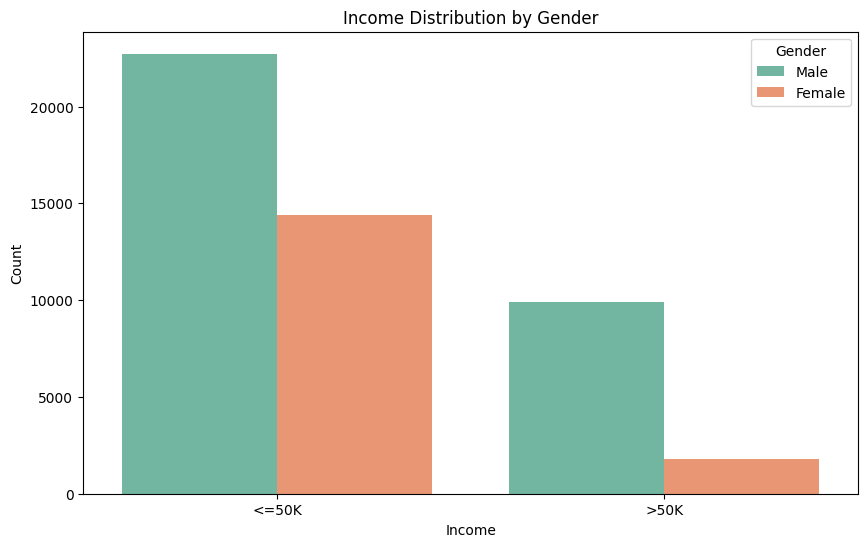

In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot income distribution based on Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income', hue='gender', palette='Set2')
# Add titles and labels
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Gender')

# Show the plot
plt.show()


According to the this graph, We can see females' income is considering these two catergories less than compare with male.

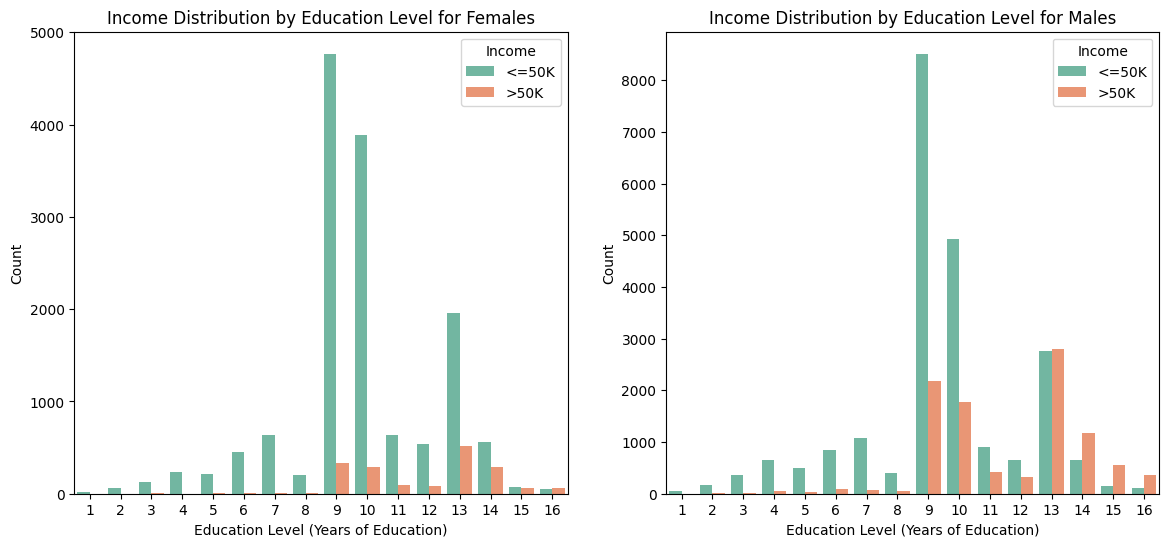

In [ ]:
#sub plot
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


# Plot for Females
plt.subplot(1, 2, 1)
sns.countplot(data=df[df['gender'] == 'Female'], x='educational-num', hue='income', palette='Set2')
plt.title('Income Distribution by Education Level for Females')
plt.xlabel('Education Level (Years of Education)')
plt.ylabel('Count')
plt.legend(title='Income')

# Plot for Males
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.countplot(data=df[df['gender'] == 'Male'], x='educational-num', hue='income', palette='Set2')
plt.title('Income Distribution by Education Level for Males')
plt.xlabel('Education Level (Years of Education)')
plt.ylabel('Count')
plt.legend(title='Income')


# Show the plots
plt.show()


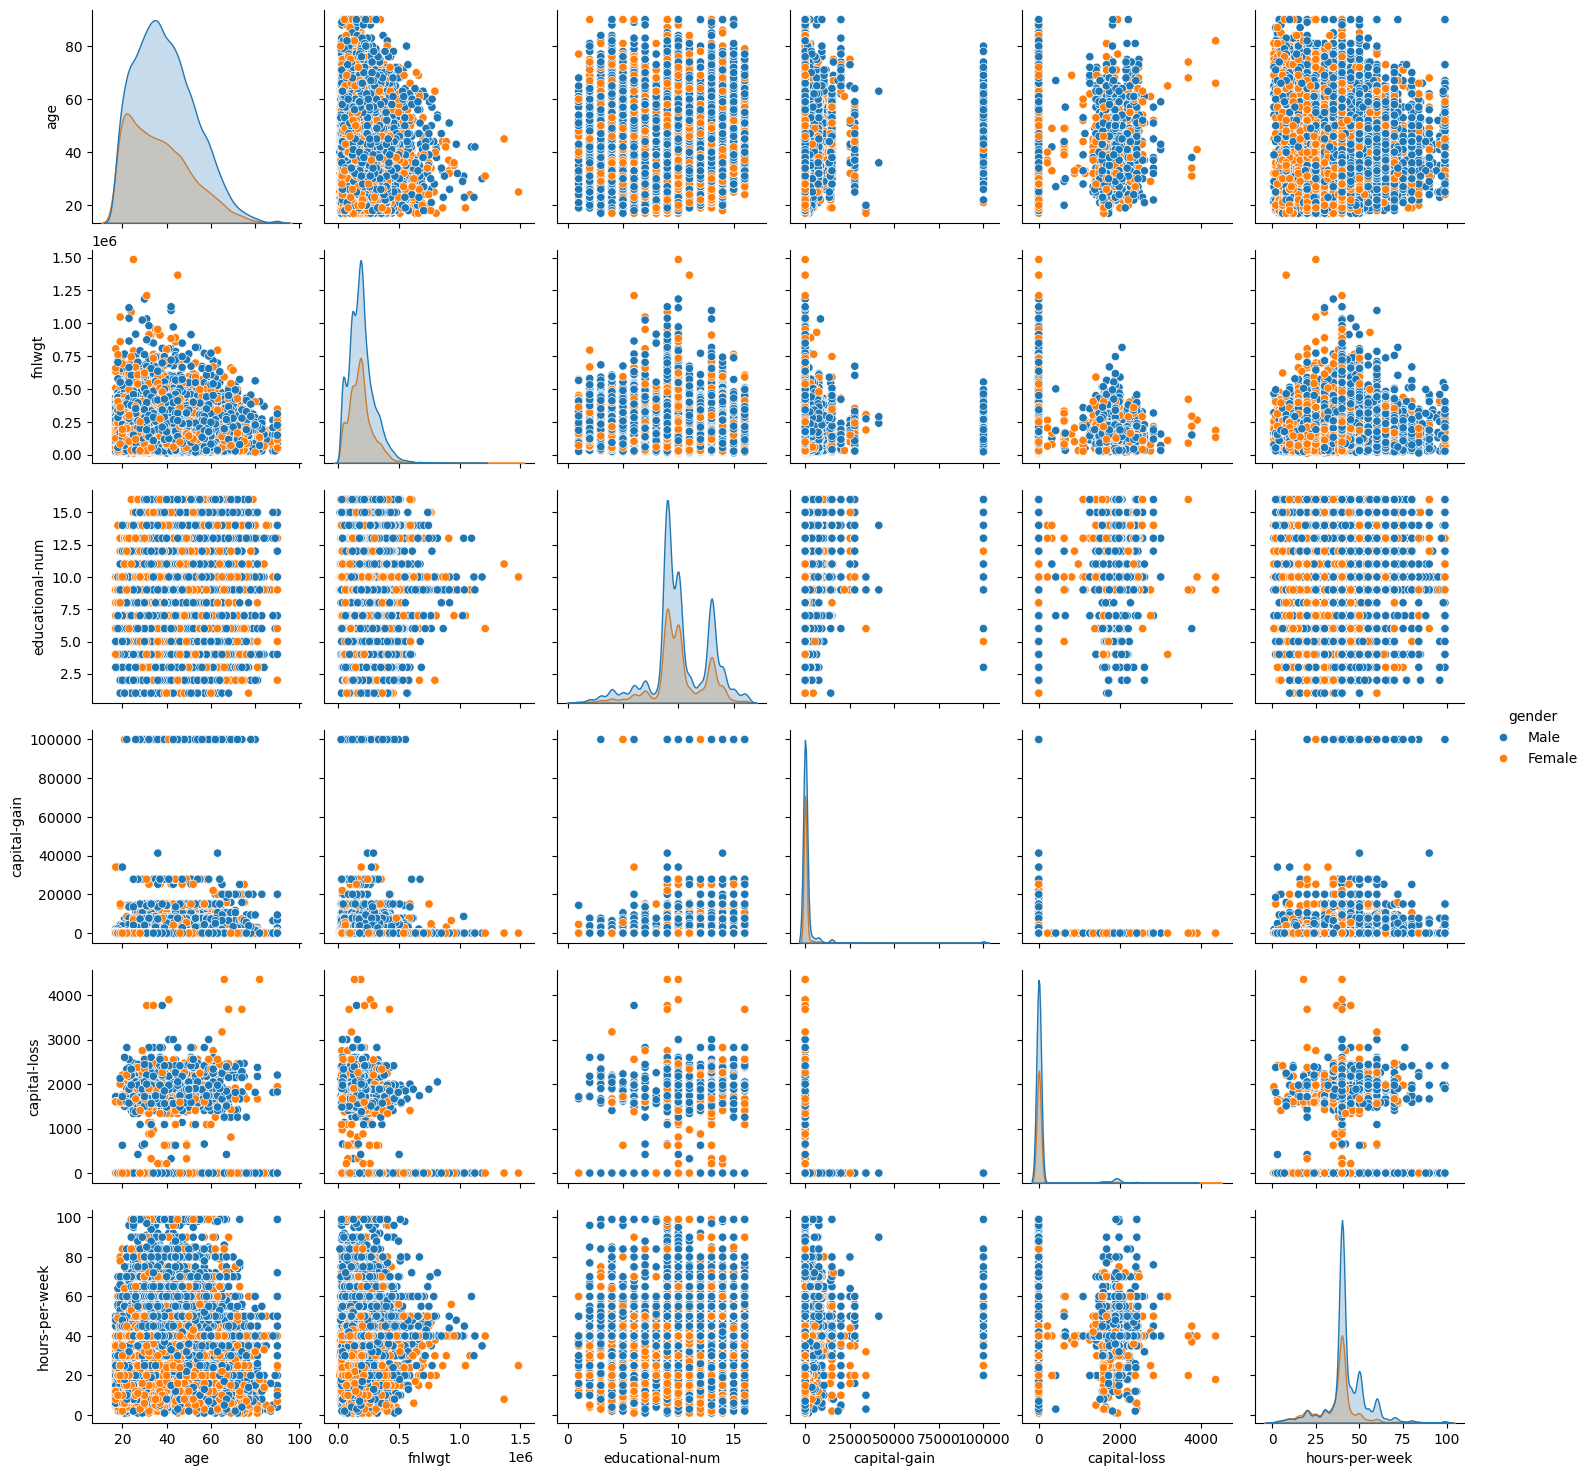

In [ ]:
sns.pairplot(x_valtrain,hue='gender');

In [ ]:
# Check for null values in the train set
x_valtrain.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
# Check for null values in the test set
x_test.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


# Data Preprocessing

Handle missing values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Handle missing values
#fill the unkonown values
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)


<ipython-input-118-c5204bf15928>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)
<ipython-input-118-c5204bf15928>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Train-test-split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop(columns='income')
y = df['income']

Label Encoder


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#  Label Encoding of the target variable ('income')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


One Hot Encoding

In [ ]:
#  One-Hot Encoding of categorical columns
X = pd.get_dummies(X, drop_first=True)


Train-Test-Validation

In [ ]:
# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling using StandardScaler
scaler = StandardScaler()

# Apply scaling only on numerical features
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_val_scaled = scaler.transform(X_val)



# Model Implementation and Evaluation

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Linear Regression Model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predictions on the Validation Set
y_val_pred = reg.predict(X_val_scaled)

In [ ]:
# Evaluate the Linear Regression Model
# R-squared (coefficient of determination)
train_score = reg.score(X_train_scaled, y_train)
val_score = reg.score(X_val_scaled, y_val)
print(f"Training R² Score (Linear Regression): {train_score}")
print(f"Validation R² Score (Linear Regression): {val_score}")

Training R² Score (Linear Regression): 0.3666798068330317
Validation R² Score (Linear Regression): 0.36865319801965035


In [ ]:
# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 0.09719357122871669


In [ ]:
# R² on the validation set
r2_rf = r2_score(y_val, y_val_pred_rf)
print(f"R² on Validation Set (Random Forest): {r2_rf}")

R² on Validation Set (Random Forest): 0.4584248314524141


Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize and Train the Random Forest Regressor Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#  Make Predictions on the Validation Set
y_val_pred_rf = rf_reg.predict(X_val_scaled)

In [ ]:
# Evaluate the Linear Regression Model
# R-squared (coefficient of determination)
train_score_rf = rf_reg.score(X_train_scaled, y_train)
val_score_rf = rf_reg.score(X_val_scaled, y_val)
print(f"Training R² Score (Random Forest): {train_score_rf}")
print(f"Validation R² Score (Random Forest): {val_score_rf}")


Training R² Score (Random Forest): 0.9224133799669603
Validation R² Score (Random Forest): 0.4584248314524141


In [ ]:
# Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# R² on the validation set
# R² on the validation set
r2_rf = r2_score(y_val, y_val_pred_rf)
print(f"R² on Validation Set (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 0.09719357122871669
R² on Validation Set (Random Forest): 0.4584248314524141


1. Linear Regression :

*   Training R² Score: 0.3667
*   Validation R² Score: 0.3687


 The low R² scores indicate that it does not capture the variability in the target variable very well. This suggests the model may not be complex enough to handle the underlying patterns and relationships in the data.

2. Random Forest Regressoin :


*  Training R² Score: 0.9224
*  Mean Squared Error: 0.0972
*  Validation R² Score: 0.4584
*  Mean Squared Error: 0.0972

The Random Forest Regressor shows significantly better performance than Linear Regression, as indicated by its higher R² scores. The training R² of 0.9224 suggests the model is highly capable of capturing complex patterns during training. However, the drop to a validation R² of 0.4584 indicates some level of overfitting, though the model still generalizes better than Linear Regression.

Cross validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the Linear Regression model
reg = LinearRegression()
cv_scores = cross_val_score(reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# The scores are negative MSE, so we negate them to get positive values
cv_scores = -cv_scores

# Print the cross-validation results
print(f"Cross-Validation MSE Scores (Linear Regression): {cv_scores}")
print(f"Average MSE (Linear Regression): {cv_scores.mean()}")


Cross-Validation MSE Scores (Linear Regression): [1.13421731e-01 1.16934427e-01 1.17502507e-01 1.80708763e+23
 1.18714390e-01]
Average MSE (Linear Regression): 3.6141752553609995e+22


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores_rf = cross_val_score(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# The scores are negative MSE, so we negate them to get positive values
cv_scores_rf = -cv_scores_rf

# Print the cross-validation results
print(f"Cross-Validation MSE Scores (Random Forest): {cv_scores_rf}")
print(f"Average MSE (Random Forest): {cv_scores_rf.mean()}")

Cross-Validation MSE Scores (Random Forest): [0.09851998 0.10508994 0.10107609 0.0998304  0.10359179]
Average MSE (Random Forest): 0.10162164161721396


# Conclusion

*  Data Exploration: EDA identified key factors like age, education,
   and occupation that influence income levels.

*   Data Preprocessing: Handling missing values, encoding categorical
    variables, and scaling numerical features prepared the data for modeling.

*   Model Selection: Various algorithms (e.g., Decision Trees, Random   Forests) were evaluated for their predictive performance.

*   Model Evaluation: The selected model showed strong accuracy and effectiveness in classifying income levels.

*   Insights: Key determinants, especially education and occupation, significantly correlated with income, providing useful insights for decision-making.

* Future Work: Future improvements could include adding more features, experimenting with complex models, and using cross-validation for robustness.

In essence, the project successfully demonstrated how machine learning can predict income levels while revealing important trends and insights.

# References.

https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

https://www.javatpoint.com/data-preprocessing-machine-learning

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/data